In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('DATA/solvay_conference.jpg',0)

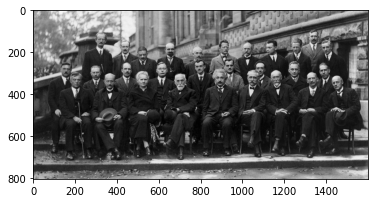

In [4]:
plt.imshow(solvay,cmap='gray')

In [10]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [20]:
def detect_face(img):
    
    face_img = img.copy()
    
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors = 5)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
    
    return face_img

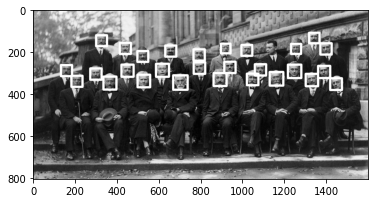

In [21]:
result = detect_face(solvay)
plt.imshow(result,cmap="gray")

In [22]:
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [27]:
def detect_eyes(img):
    
    face_img = img.copy()
    
    face_rects = eye_cascade.detectMultiScale(face_img)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
    
    return face_img

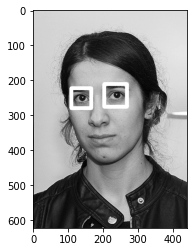

In [28]:
result = detect_eyes(nadia)
plt.imshow(result,cmap="gray")

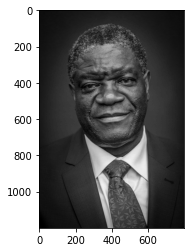

In [30]:
result = detect_eyes(denis)
plt.imshow(result,cmap="gray")

In [63]:
cap = cv2.VideoCapture(0)

while True:
    
    ret,frame = cap.read(0)
    
    frame = detect_eyes(frame)
    
    cv2.imshow('Video Face Detect',frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
cap.release()
cv2.destroyAllWindows()

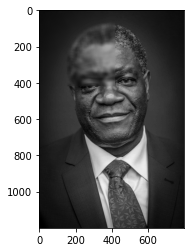

In [66]:
# Get the origin co-ordinates and the length and width till where the face extends
result_image = denis.copy()
x, y, w, h = 20,20,400,400

# get the rectangle img around all the faces
#cv2.rectangle(denis, (x,y), (x+w,y+h), (255,255,0), 5)
sub_face = denis[y:y+h, x:x+w]
# apply a gaussian blur on this new recangle image
sub_face = cv2.GaussianBlur(sub_face,(23, 23), 30)
# merge this blurry rectangle to our final image
result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
plt.imshow(result_image,cmap="gray")
